In [367]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Классная работа

In [368]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [369]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

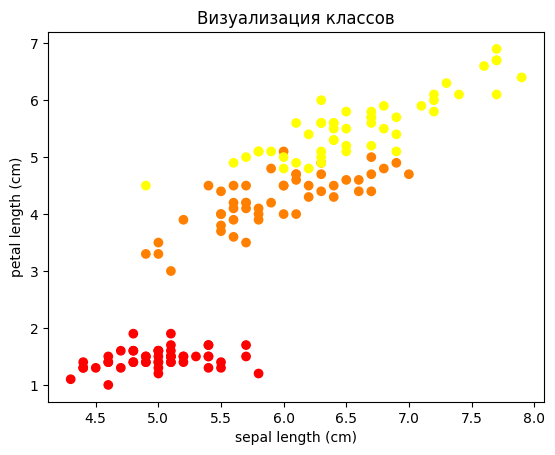

In [370]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [371]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

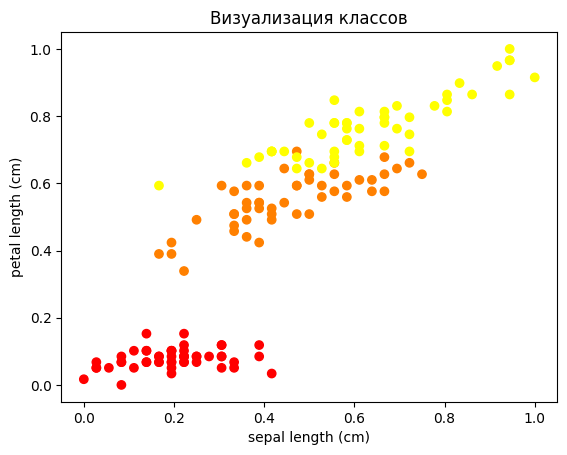

In [372]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [373]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

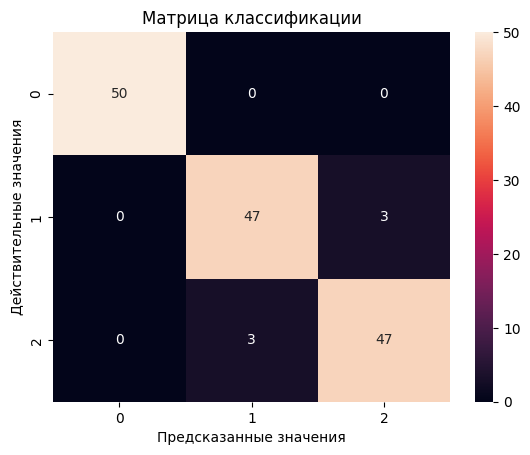

In [374]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [375]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [376]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [377]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


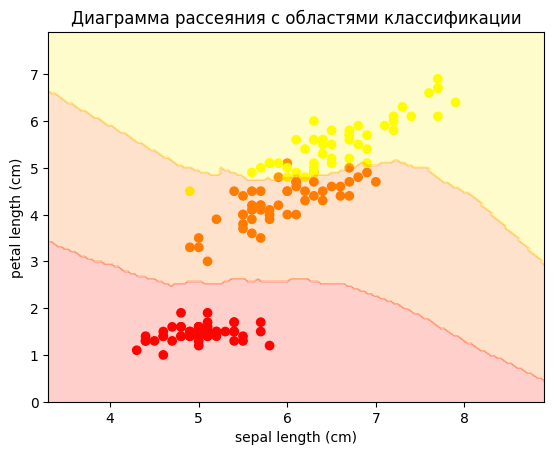

In [378]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [379]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [380]:
knn.predict(observation_new_scaled)

array([2])

In [381]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [382]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[0.03254042, 0.05555556, 0.08503951]]), array([[121, 113, 114]]))

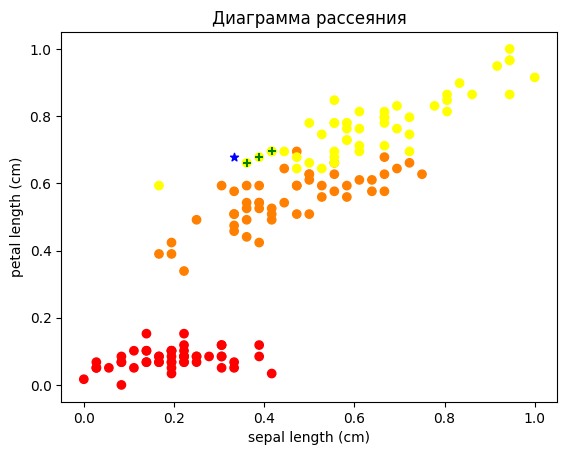

In [383]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Домашняя работа

## 1. Постройте последний график методических указаний в исходном пространстве признаков.

In [384]:
X = np.array(X)

In [385]:
observation_new = [[5.5, 5]]

In [386]:
knn.fit(X, y)
y_pred = knn.predict(X)

In [387]:
knn.predict(observation_new)

array([2])

In [388]:
knn.predict_proba(observation_new)

array([[0., 0., 1.]])

In [389]:
distances, indices = knn.kneighbors(observation_new)
distances, indices

(array([[0.14142136, 0.2       , 0.31622777]]), array([[121, 113, 114]]))

In [408]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [413]:
np.unique(y)

array([0, 1, 2])

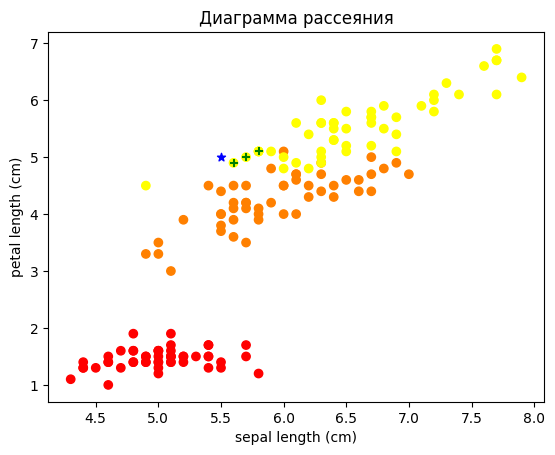

In [425]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

scatter = plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

plt.scatter(X[indices[0]][0][0], X[indices[0]][0][1], marker='+', color='g')
plt.scatter(X[indices[0]][1][0], X[indices[0]][1][1], marker='+', color='g')
plt.scatter(X[indices[0]][2][0], X[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

**Не нормализованные данные**

In [157]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)

In [158]:
observation_new = [[5.5, 5]]

In [159]:
distances, indices = knn.kneighbors(observation_new)
distances, indices

(array([[0.14142136, 0.2       , 0.31622777, 0.31622777, 0.31622777]]),
 array([[121, 113, 142, 114, 101]]))

In [149]:
print((X[indices[0]][0][0], X[indices[0]][0][1])),
print((X[indices[0]][1][0], X[indices[0]][1][1])),
print((X[indices[0]][2][0], X[indices[0]][2][1])),
print((X[indices[0]][3][0], X[indices[0]][3][1])),
print((X[indices[0]][4][0], X[indices[0]][4][1]))

(5.6, 4.9)
(5.7, 5.0)
(5.8, 5.1)
(5.8, 5.1)
(5.8, 5.1)


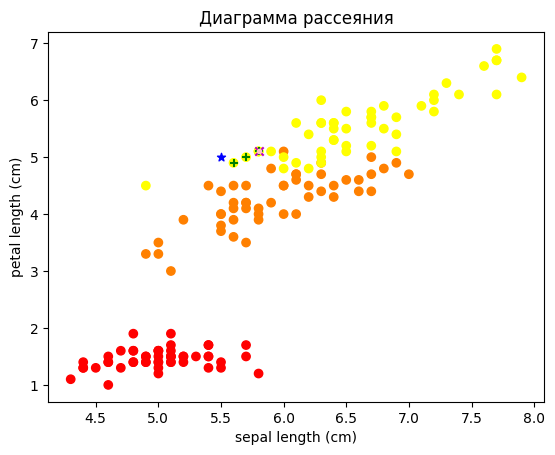

In [150]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

plt.scatter(X[indices[0]][0][0], X[indices[0]][0][1], marker='+', color='g')
plt.scatter(X[indices[0]][1][0], X[indices[0]][1][1], marker='+', color='g')
plt.scatter(X[indices[0]][2][0], X[indices[0]][2][1], marker='+', color='g')
plt.scatter(X[indices[0]][3][0], X[indices[0]][3][1], marker='x', color='m')
plt.scatter(X[indices[0]][4][0], X[indices[0]][4][1], marker='.', color='pink')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

**Нормализованные данные**

In [160]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [187]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

In [188]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

In [189]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[0.03254042, 0.05555556, 0.08503951, 0.08503951, 0.08503951]]),
 array([[121, 113, 101, 114, 142]]))

In [190]:
print((X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1])),
print((X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1])),
print((X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1])),
print((X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1])),
print((X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1]))

(0.36111111111111094, 0.6610169491525424)
(0.38888888888888884, 0.6779661016949152)
(0.4166666666666665, 0.6949152542372881)
(0.4166666666666665, 0.6949152542372881)
(0.4166666666666665, 0.6949152542372881)


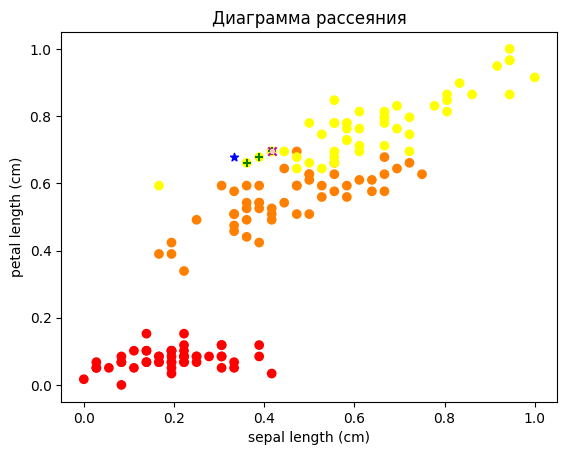

In [191]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1], marker='x', color='m')
plt.scatter(X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1], marker='.', color='pink')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## 3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

In [192]:
observation_new = [[6.8, 1.3]]
observation_new_scaled = scaler.transform(observation_new)
observation_new_scaled

array([[0.69444444, 0.05084746]])

In [193]:
knn.predict(observation_new_scaled)

array([0])

In [194]:
knn.predict_proba(observation_new_scaled)

array([[1., 0., 0.]])

In [195]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[0.27829439, 0.30743014, 0.31298655, 0.36111111, 0.36150866]]),
 array([[14, 15, 18, 36, 33]]))

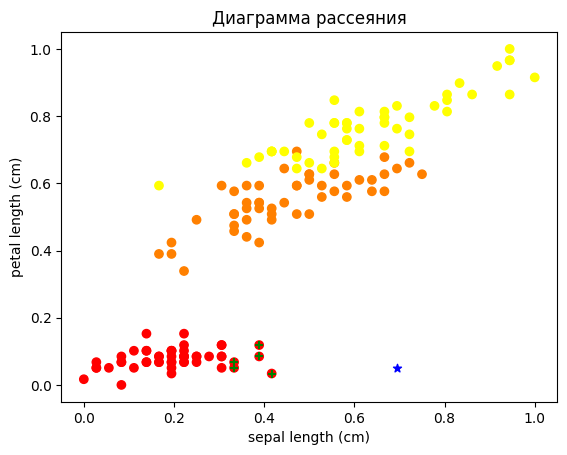

In [196]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1], marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [197]:
observation_new = [[10.4, 12.7]]
observation_new_scaled = scaler.transform(observation_new)
observation_new_scaled

array([[1.69444444, 1.98305085]])

In [198]:
knn.predict(observation_new_scaled)

array([2])

In [199]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [200]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[1.2364825 , 1.26360024, 1.26360024, 1.27375142, 1.29378668]]),
 array([[118, 122, 117, 131, 105]]))

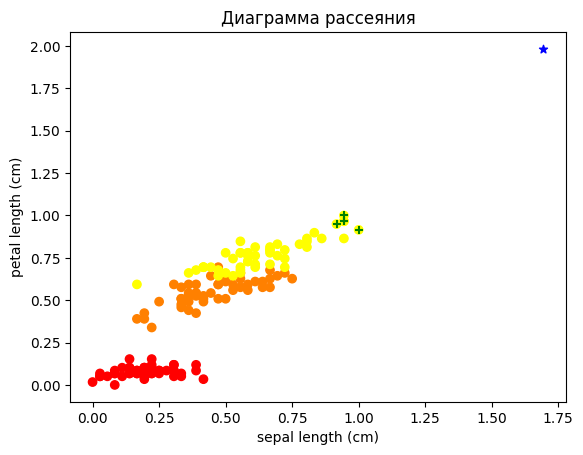

In [201]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1], marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.


In [260]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cityblock')
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

In [261]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
observation_new_scaled

array([[0.33333333, 0.6779661 ]])

In [262]:
knn.predict(observation_new_scaled)

array([2])

In [263]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [264]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[0.04472693, 0.05555556, 0.10028249, 0.10028249, 0.10028249]]),
 array([[121, 113, 101, 114, 142]]))

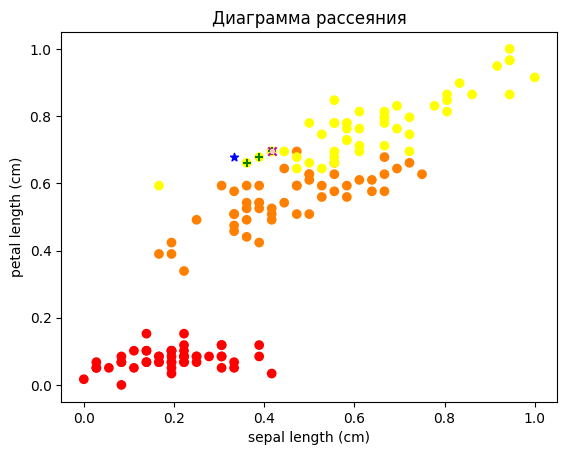

In [265]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1], marker='x', color='m')
plt.scatter(X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1], marker='.', color='pink')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [266]:
knn = KNeighborsClassifier(n_neighbors=5, metric='correlation')
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

In [267]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
observation_new_scaled

array([[0.33333333, 0.6779661 ]])

In [268]:
knn.predict(observation_new_scaled)

array([1])

In [269]:
knn.predict_proba(observation_new_scaled)

array([[0., 1., 0.]])

In [270]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[0., 0., 0., 0., 0.]]), array([[64, 66, 62, 63, 60]]))

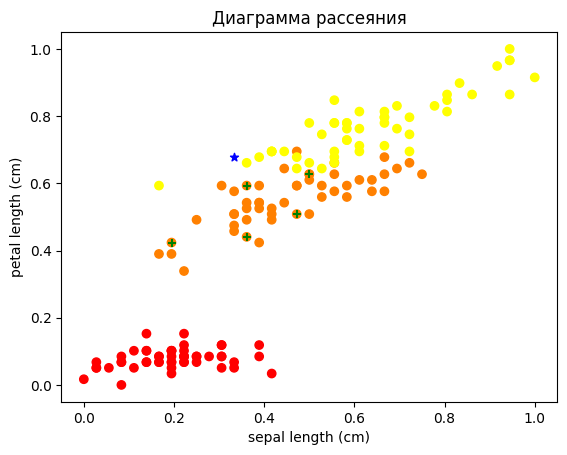

In [271]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1], marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [285]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

In [286]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
observation_new_scaled

array([[0.33333333, 0.6779661 ]])

In [287]:
knn.predict(observation_new_scaled)

array([1])

In [288]:
knn.predict_proba(observation_new_scaled)

array([[0. , 0.8, 0.2]])

In [289]:
distances, indices = knn.kneighbors(observation_new_scaled)
distances, indices

(array([[1.63718173e-05, 9.19571893e-05, 1.74455913e-04, 3.57424392e-04,
         9.25926573e-04]]),
 array([[ 93,  59,  84,  60, 121]]))

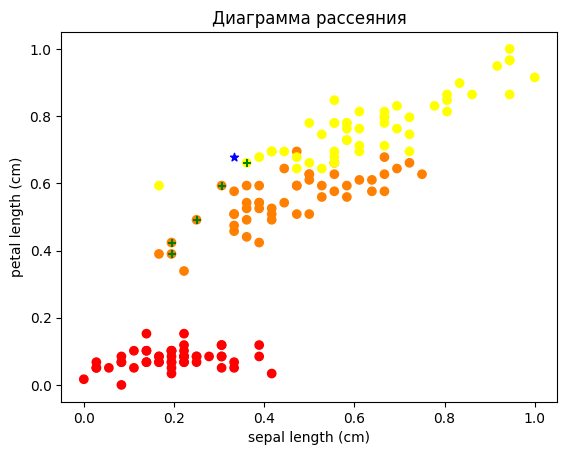

In [293]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][3][0], X_scaled[indices[0]][3][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][4][0], X_scaled[indices[0]][4][1], marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## 5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [313]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [314]:
X = data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [315]:
X_scaled = scaler.fit_transform(X)

In [316]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

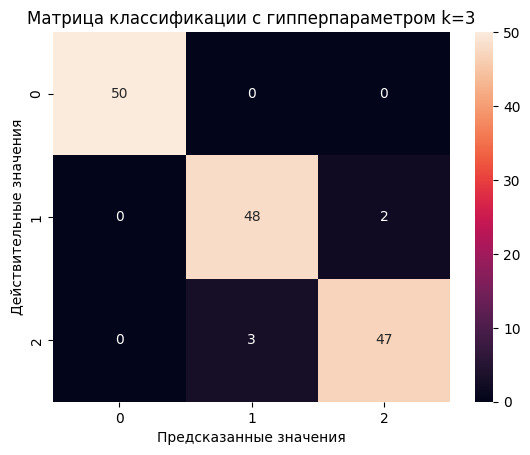

In [317]:
plt.title("Матрица классификации с гипперпараметром k=3")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [318]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        51
           2       0.94      0.96      0.95        49

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [319]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

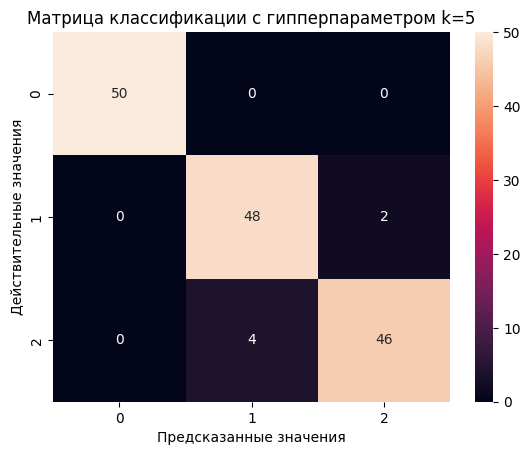

In [320]:
plt.title("Матрица классификации с гипперпараметром k=5")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [321]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        52
           2       0.92      0.96      0.94        48

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [322]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

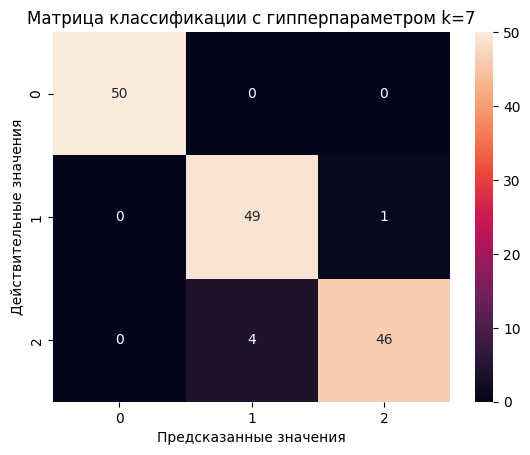

In [323]:
plt.title("Матрица классификации с гипперпараметром k=7")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [324]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        53
           2       0.92      0.98      0.95        47

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [325]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

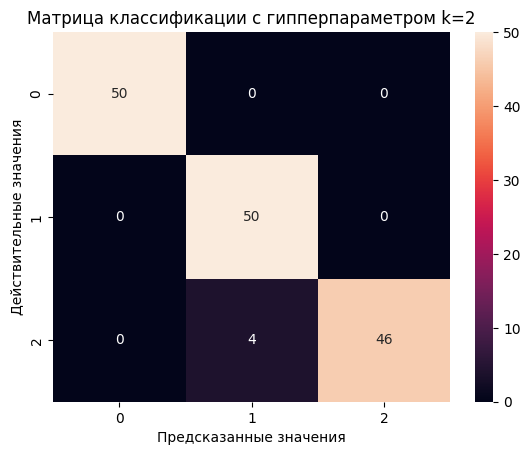

In [327]:
plt.title("Матрица классификации с гипперпараметром k=2")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [328]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.93      0.96        54
           2       0.92      1.00      0.96        46

    accuracy                           0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.97      0.97       150



## 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [329]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

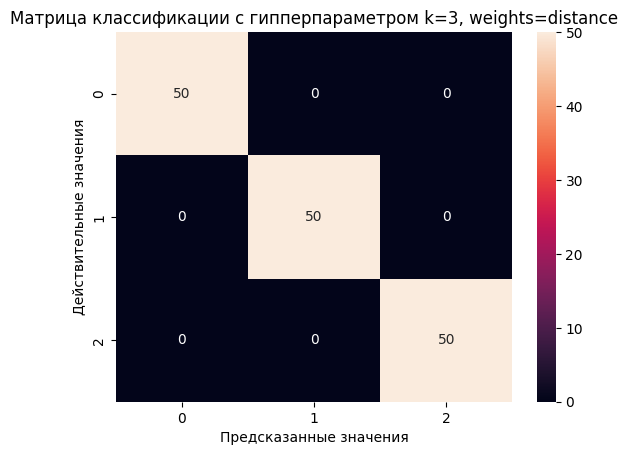

In [330]:
plt.title("Матрица классификации с гипперпараметром k=3, weights=distance")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [331]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## 7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

In [338]:
ac = []
K = []
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)
  y_pred = knn.predict(X_scaled)
  ac.append(round(accuracy_score(y, y_pred), 2))
  K.append(k)
ac

[1.0, 0.97, 0.97, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97]

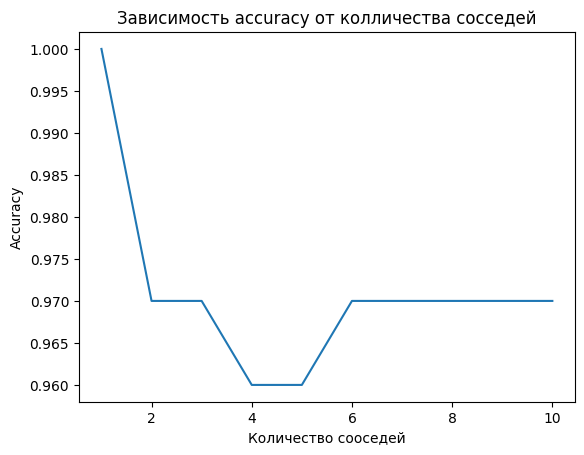

In [340]:
plt.plot(K, ac)
plt.title('Зависимость accuracy от колличества сосседей')
plt.xlabel('Количество сооседей')
plt.ylabel('Accuracy')
plt.show()

## 8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [360]:
cancer = load_breast_cancer()
features = cancer.data

data = pd.DataFrame(features, columns = cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [361]:
X = np.array(data)
y = cancer.target

In [362]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)

In [366]:
print('r2 =', round(r2_score(y, y_pred), 2))
print('MSE =', round(mean_squared_error(y, y_pred), 2))

r2 = 0.88
MSE = 0.03
